<a href="https://colab.research.google.com/github/jonimccawley/OpenCV-Workshop/blob/main/Object_Detection_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import clear_output
from google.colab.patches import cv2_imshow


In [7]:

# Assuming you also uploaded the "MobileNetSSD_deploy.prototxt" and "MobileNetSSD_deploy.caffemodel"
prototxt_path = "MobileNetSSD_deploy.prototxt"
caffemodel_path = "MobileNetSSD_deploy.caffemodel"

# Load the pre-trained MobileNet SSD model
net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)


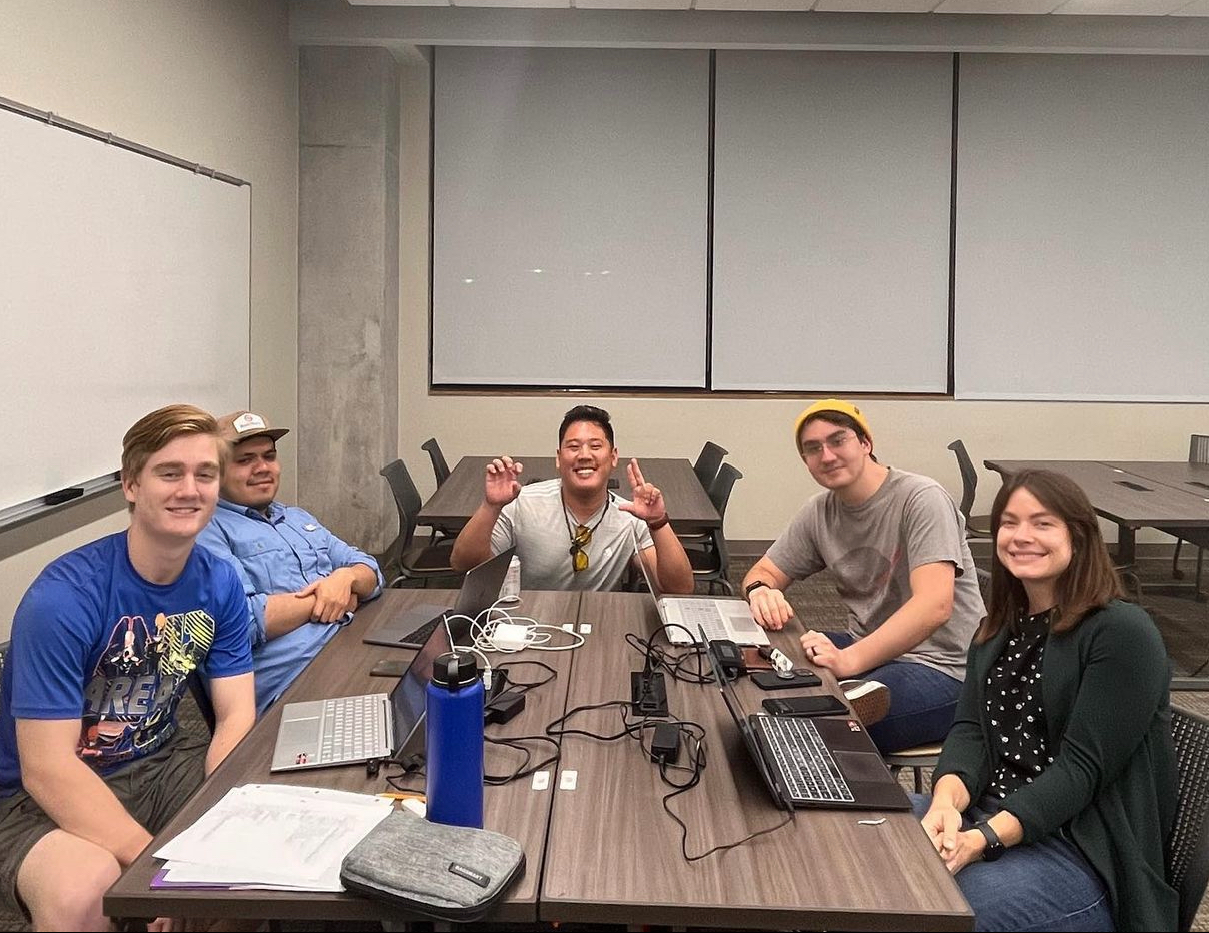

In [8]:
# Read the image
image_path = "group_image.png"
image = cv2.imread(image_path)

# # Upload image and model files to Colab runtime
# uploaded = files.upload()
# image_path = list(uploaded.keys())[0]  # Use the first uploaded file
# image = cv2.imread(image_path)

cv2_imshow(image)


In [9]:

# Define the list of classes the model can detect
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

# Specify the names of the classes you want to detect:
DESIRED_CLASSES = ["person"]  # Change this list as per your preferences.

# Convert the class names into indices:
IDX = [CLASSES.index(label) for label in DESIRED_CLASSES if label in CLASSES]



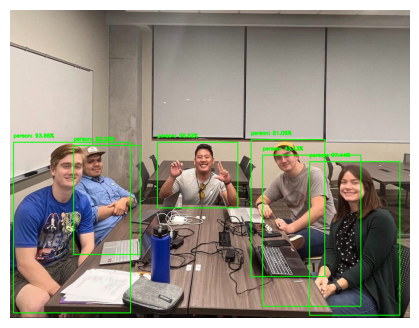

In [10]:
# Convert to RGB for displaying with matplotlib
# This conversion is necessary because Matplotlib expects images in RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image and convert it to a blob
# This line preprocesses the image for input to a deep learning network.
blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)

# Set the blob as the input to the network
net.setInput(blob)

# Get the detections
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    # Extract the confidence of the detection
    confidence = detections[0, 0, i, 2]

    # Extract the index of the class label
    idx = int(detections[0, 0, i, 1])

    # Filter out weak detections and only consider classes in IDX
    if confidence > 0.2 and idx in IDX:
        # Get the bounding box coordinates
        box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the bounding box and label on the image
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        cv2.rectangle(image_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image_rgb, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image using matplotlib
plt.figure(figsize=(6,4))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
